In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("DataCSVS/cleanedPlayerData41-42.csv", encoding='latin1')


df.head()






,Weight,IS,OS,Rng,Fin,Reb,IDef,PDef,IQ,Pass,...,3OFM,3OFA,3OF%,TO,PF,DQ,FD,Wingspan_inches,Height_inches,Vertical_float
0,155,9,6,9,5,4,6,14,15,16,...,28,66,0.424,1.9,1.3,0.0,1.4,72.0,68.0,24.5
1,190,8,6,7,12,10,8,11,16,17,...,57,156,0.365,4.1,2.3,2.0,1.8,78.0,73.0,29.5
2,180,6,17,12,9,10,7,15,17,10,...,96,215,0.447,1.9,1.6,1.0,1.6,74.0,73.0,29.5
3,210,7,9,11,9,11,8,10,16,12,...,48,99,0.485,1.1,1.0,0.0,0.9,80.0,75.0,31.5
4,210,15,10,10,9,10,13,11,17,10,...,44,117,0.376,1.6,1.9,1.0,2.1,86.0,81.0,31.0


In [27]:
df.columns

Index(['Weight', 'IS', 'OS', 'Rng', 'Fin', 'Reb', 'IDef', 'PDef', 'IQ', 'Pass',
       'Hnd', 'Drv', 'Str', 'Spd', 'Sta', 'F-M', 'F-A', 'F%', 'IS-M', 'IS-A',
       'IS%', 'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD',
       'Wingspan_inches', 'Height_inches', 'Vertical_float'],
      dtype='object')

Driving

In [28]:

'''

#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards
df = df[(df['DR-A'] >= 75)] #attempted ~ 2 3PA a game


columns_to_drop = ['F-M', 'F-A', 'F%', 'IS-M', 'IS-A',
       'IS%', 'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%','DR-M', 'DR-A',
        'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('DR%', axis=1)
y = data['DR%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''


"\n\n#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards\ndf = df[(df['DR-A'] >= 75)] #attempted ~ 2 3PA a game\n\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%', 'IS-M', 'IS-A',\n       'IS%', 'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%','DR-M', 'DR-A',\n        'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('DR%', axis=1)\ny = data['DR%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

3pt Shooting

In [29]:
'''
#columns_to_drop = ['F-M']
df = df[(df['3P-A'] >= 100)] #attempted ~ 2 3PA a game
#df = df[df['2OFA'] >= 100]


columns_to_drop = ['F-M', 'F-A', 'F%', 'IS-M', 'IS-A',
       'IS%', 'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('3P%', axis=1)
y = data['3P%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''

"\n#columns_to_drop = ['F-M']\ndf = df[(df['3P-A'] >= 100)] #attempted ~ 2 3PA a game\n#df = df[df['2OFA'] >= 100]\n\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%', 'IS-M', 'IS-A',\n       'IS%', 'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('3P%', axis=1)\ny = data['3P%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n"

Inside Shooting

In [30]:

'''
df = df[(df['IS-A'] >= 100)] #attempted ~ 2 ISPA a game

df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #For Bigs

#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards
#df = df[(df['IS-A'] >= 50)] #attempted ~ 2 ISPA a gam

columns_to_drop = ['F-M', 'F-A', 'F%', 'IS-M', 'IS-A',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('IS%', axis=1)
y = data['IS%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

(2076, 19)


Finishing

In [31]:
'''
df = df[(df['F-A'] >= 30)] #attempted ~ 2 3PA a game




columns_to_drop = ['F-M', 'F-A', 'IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('F%', axis=1)
y = data['F%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[(df['F-A'] >= 30)] #attempted ~ 2 3PA a game\n\n\n\n\ncolumns_to_drop = ['F-M', 'F-A', 'IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('F%', axis=1)\ny = data['F%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Mid-Range

In [32]:
'''
df = df[df['MR-A'] >= 70]
df = df[df['2OFA'] >= 100]

columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)
print(df.shape)


data = df
X = data.drop('MR%', axis=1)
y = data['MR%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['MR-A'] >= 70]\ndf = df[df['2OFA'] >= 100]\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\nprint(df.shape)\n\n\ndata = df\nX = data.drop('MR%', axis=1)\ny = data['MR%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

FT%

In [33]:
'''
df = df[(df['FTA'] >= 95)] #attempted ~ 2 3PA a game

columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('FT%', axis=1)
y = data['FT%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[(df['FTA'] >= 95)] #attempted ~ 2 3PA a game\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n       '2OF%', '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('FT%', axis=1)\ny = data['FT%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

2OF% For Bigs



In [34]:
'''
df = df[df['2OFA'] >= 100]
df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs


columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)

print(df.shape)

data = df
X = data.drop('2OF%', axis=1)
y = data['2OF%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['2OFA'] >= 100]\ndf = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs\n\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\nprint(df.shape)\n\ndata = df\nX = data.drop('2OF%', axis=1)\ny = data['2OF%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

2OF% For Perimeter Player

In [35]:
'''
df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])]
df = df[df['2OFA'] >= 100]
columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)

print(df.shape)

data = df
X = data.drop('2OF%', axis=1)
y = data['2OF%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])]\ndf = df[df['2OFA'] >= 100]\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\nprint(df.shape)\n\ndata = df\nX = data.drop('2OF%', axis=1)\ny = data['2OF%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

3OF% for Guards

In [36]:
'''
df = df[df['2OFA'] >= 100]
df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #Guards


columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('3OF%', axis=1)
y = data['3OF%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['2OFA'] >= 100]\ndf = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #Guards\n\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('3OF%', axis=1)\ny = data['3OF%']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Rebounds Per Games (For Bigs)

In [37]:
'''
#df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #Bigs
df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #Guards
df = df[df['2OFA'] >= 100]

columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)

print(df.shape)

data = df
X = data.drop('RebP', axis=1)
y = data['RebP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\n#df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #Bigs\ndf = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #Guards\ndf = df[df['2OFA'] >= 100]\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'Ast', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\nprint(df.shape)\n\ndata = df\nX = data.drop('RebP', axis=1)\ny = data['RebP']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Assists Per Game (for Perimeter Players (Mostly PGS))

In [38]:
'''
df = df[df['2OFA'] > 100]
#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #guards
df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs

columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('Ast', axis=1)
y = data['Ast']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['2OFA'] > 100]\n#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #guards\ndf = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs\n\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Stl', 'Blk', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('Ast', axis=1)\ny = data['Ast']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Steals per Game

In [39]:
'''
df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #For Bigs
#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards

df = df[df['2OFA'] >= 100] #Filters for players who play a decent amount per game
columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Blk', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('Stl', axis=1)
y = data['Stl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ndf = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #For Bigs\n#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards\n\ndf = df[df['2OFA'] >= 100] #Filters for players who play a decent amount per game\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP', 'Ast', 'Blk', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('Stl', axis=1)\ny = data['Stl']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Blocks Per Game

In [40]:
'''
df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs
#df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards

df = df[df['2OFA'] > 100]
columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP','Ast', 'Stl', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('Blk', axis=1)
y = data['Blk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''


"\n#df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #bigs\ndf = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards\n\ndf = df[df['2OFA'] > 100]\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP','Ast', 'Stl', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ', 'FD']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('Blk', axis=1)\ny = data['Blk']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Fouls Drawn Per Game

In [41]:
'''
#df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #For Bigs
df = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards
df = df[df['2OFA'] > 100]
columns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',
        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',
       'DR%', 'FTM', 'FTA', 'FT%', 'RebP','Ast', 'Stl','Blk', '2OFM', '2OFA', '2OF%',
        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ']



df = df.drop(columns_to_drop,axis=1)


print(df.shape)

data = df
X = data.drop('FD', axis=1)
y = data['FD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\n#df = df[df['2OFA'] >= 0.7 * (df['2OFA'] + df['3OFA'])] #For Bigs\ndf = df[df['3OFA'] >= 0.4 * (df['2OFA'] + df['3OFA'])] #For Guards\ndf = df[df['2OFA'] > 100]\ncolumns_to_drop = ['F-M', 'F-A', 'F%','IS-M', 'IS-A', 'IS%',\n        'MR-M', 'MR-A', 'MR%', '3P-M', '3P-A', '3P%', 'DR-M', 'DR-A',\n       'DR%', 'FTM', 'FTA', 'FT%', 'RebP','Ast', 'Stl','Blk', '2OFM', '2OFA', '2OF%',\n        '3OFM', '3OFA', '3OF%', 'TO', 'PF', 'DQ']\n\n\n\ndf = df.drop(columns_to_drop,axis=1)\n\n\nprint(df.shape)\n\ndata = df\nX = data.drop('FD', axis=1)\ny = data['FD']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

Linear Regression Model


In [42]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



model = Ridge()
model.fit(X_train_pca, y_train)

# Retrieve the coefficients from the Ridge model
coefficients = model.coef_
#print("Coefficients:", coefficients)

# Make predictions and evaluate
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_pca)

print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.43725335412890287


In [43]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Optionally, you can reset the index to make it easier to read
results = results.reset_index(drop=True)

# Display the DataFrame
#print(results.head())  # Shows the first few rows of the DataFrame

# Create a DataFrame with actual features from X_test
results = pd.DataFrame(X_test)

# Add actual and predicted values to this DataFrame
results['Actual'] = y_test
results['Predicted'] = y_pred

# Reset the index to align the actual and predicted values with their corresponding features
results = results.reset_index(drop=True)

# Display the DataFrame
print(results.head())  # Shows the first few rows of the DataFrame






   Weight  IS  OS  Rng  Fin  Reb  IDef  PDef  IQ  Pass  Hnd  Drv  Str  Spd  \
0     225  15   7   11    7   10     9     6   6     6    8   10    8   13   
1     210   8   6   10    6   15    10     3   5     8    5    5    6    3   
2     215   8   8    8    9    7     6     6  13     5    8   10    7   12   
3     255   7   7    9    5   13     7     8  15     9    7   10    7   10   
4     245  10  12   10   11   13     5     8  15     9   10    5   12    8   

   Sta  Wingspan_inches  Height_inches  Vertical_float  Actual  Predicted  
0   10            87.25           82.0            31.0    0.55   0.593801  
1    7            86.00           81.5            31.5    0.55   0.543590  
2   13            83.25           78.0            30.5    0.50   0.530748  
3    8            87.00           83.5            23.5    0.63   0.567888  
4    7            85.00           79.5            32.0    0.57   0.581696  


In [44]:

import pandas as pd

# Retrieve the coefficients from the model
coefficients = model.coef_

# Create a DataFrame for principal components and their corresponding coefficients
pca_features = [f'PC{i+1}' for i in range(len(coefficients))]
coef_df = pd.DataFrame({'Principal Component': pca_features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients in descending order
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Display the DataFrame
print(coef_df)


   Principal Component  Coefficient
1                  PC2     0.019557
3                  PC4     0.012929
5                  PC6     0.008513
14                PC15     0.005446
2                  PC3    -0.004075
12                PC13     0.004051
6                  PC7     0.003776
9                 PC10     0.003456
13                PC14     0.003015
8                  PC9     0.002789
10                PC11     0.001697
4                  PC5    -0.001188
11                PC12    -0.000815
7                  PC8     0.000651
0                  PC1    -0.000124


In [45]:
'''
import statsmodels.api as sm

# Add a constant to the model (if it hasn't been added)
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor set

# Fit the regression model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the regression
print(model_sm.summary())
'''

"\nimport statsmodels.api as sm\n\n# Add a constant to the model (if it hasn't been added)\nX_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor set\n\n# Fit the regression model\nmodel_sm = sm.OLS(y_train, X_train_sm).fit()\n\n# Print the summary of the regression\nprint(model_sm.summary())\n"

In [46]:
import pandas as pd

# Assuming 'results' is already defined and includes 'Actual' and 'Predicted' columns

# Sort by 'Actual' in descending order and get the highest actual value row
highest_actual = results.sort_values(by='Actual', ascending=False).head(1)

# Sort by 'Actual' in ascending order and get the lowest actual value row
lowest_actual = results.sort_values(by='Actual', ascending=True).head(1)

# Sort by 'Predicted' in descending order and get the highest predicted value row
highest_predicted = results.sort_values(by='Predicted', ascending=False).head(1)

# Sort by 'Predicted' in ascending order and get the lowest predicted value row
lowest_predicted = results.sort_values(by='Predicted', ascending=True).head(1)

# Print the results
print("Highest Actual Value Row:")
print(highest_actual)

print("\nLowest Actual Value Row:")
print(lowest_actual)

print("\nHighest Predicted Value Row:")
print(highest_predicted)

print("\nLowest Predicted Value Row:")
print(lowest_predicted)


Highest Actual Value Row:
     Weight  IS  OS  Rng  Fin  Reb  IDef  PDef  IQ  Pass  Hnd  Drv  Str  Spd  \
311     235   8   7    9   11   10     5     4  13     9   11    6    8    6   

     Sta  Wingspan_inches  Height_inches  Vertical_float  Actual  Predicted  
311    7             88.0           82.5            34.5    0.71   0.585629  

Lowest Actual Value Row:
    Weight  IS  OS  Rng  Fin  Reb  IDef  PDef  IQ  Pass  Hnd  Drv  Str  Spd  \
16     220   5   0    8    6   12    10     2   1     6    2    3    1    4   

    Sta  Wingspan_inches  Height_inches  Vertical_float  Actual  Predicted  
16    4            85.25           80.5            30.0    0.35   0.508512  

Highest Predicted Value Row:
     Weight  IS  OS  Rng  Fin  Reb  IDef  PDef  IQ  Pass  Hnd  Drv  Str  Spd  \
118     250  15  11    9    8    9    11     4  14     9    8    6   14   10   

     Sta  Wingspan_inches  Height_inches  Vertical_float  Actual  Predicted  
118   10            87.25           85.0         

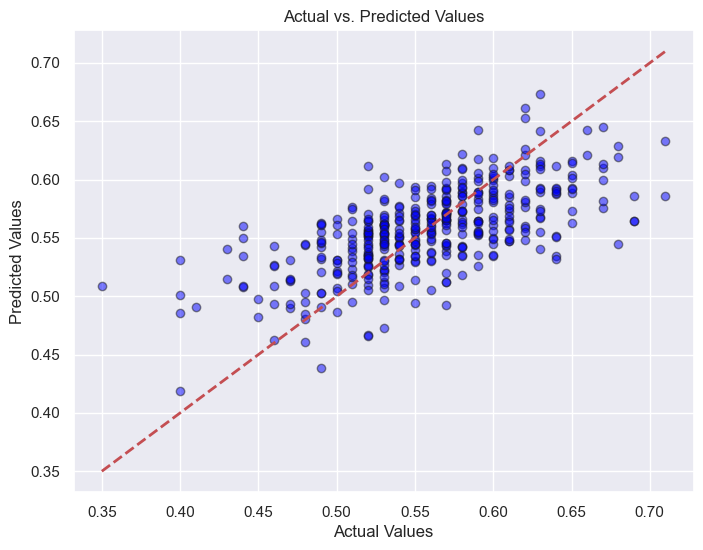

In [47]:
import matplotlib.pyplot as plt

# Assuming 'results' is already defined and includes 'Actual' and 'Predicted' columns

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.5, color='blue', edgecolor='k')
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


In [48]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Assume X and y are defined, and PCA and Ridge regression models have been fitted

# Extract PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# Extract Ridge regression coefficients
coefficients = model.coef_

# Create a DataFrame for feature contributions
feature_contributions = pd.DataFrame(index=X.columns)

# Calculate contributions by multiplying loadings with model coefficients
feature_contributions['Contribution'] = np.dot(loadings, coefficients)

# Determine the sign of contributions (positive or negative)
feature_contributions['Impact'] = np.where(feature_contributions['Contribution'] > 0, 'Positive', 'Negative')

# Sort by the magnitude of contributions
feature_contributions = feature_contributions.sort_values(by='Contribution', ascending=False)

print(feature_contributions)


                 Contribution    Impact
Height_inches        0.011938  Positive
Wingspan_inches      0.011735  Positive
IS                   0.011711  Positive
Vertical_float       0.011579  Positive
Weight               0.010715  Positive
Reb                  0.004725  Positive
Str                  0.003455  Positive
Spd                  0.003327  Positive
IQ                   0.002617  Positive
Sta                  0.002019  Positive
OS                   0.001884  Positive
PDef                 0.001689  Positive
Fin                  0.001320  Positive
Drv                  0.000502  Positive
Rng                  0.000201  Positive
Hnd                  0.000055  Positive
IDef                -0.000964  Negative
Pass                -0.001184  Negative


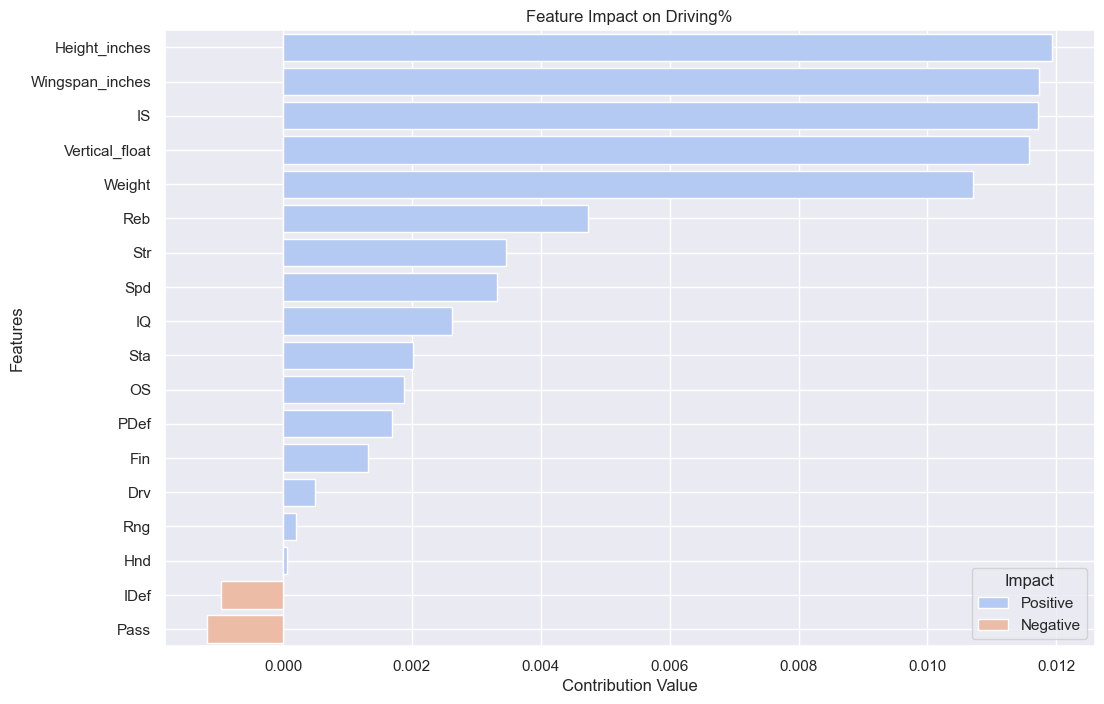

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature contributions
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_contributions['Contribution'], y=feature_contributions.index, hue=feature_contributions['Impact'], palette='coolwarm')
plt.title('Feature Impact on Driving%')
plt.xlabel('Contribution Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()
